# Animal Cell Volume Change Over Different Osmotic Pressure Gradients Due to by Salt Intake Without Regulatory Mechanisms

In this project, we attempt to model cell volume as a result of salt intake if there were no regulatory mechanisms to protect cells as various salt concentrations affect water movement through the membrane. In particular, we look at erythrocytes (red blood cells). 

In order to do this, we first derive an equation to get the volumetric flow rate based on established equations, and then we write code to apply this function in calculating the total amount of water leaving/entering the cell. We then plot the erythrocyte volume over time along with the volumes at which cell bursting and cell shrinking occur. 

## Introduction

Table salt is a very common seasoning to put on food; however too much salt can lead to significant problems as extracellular fluid osmolarity is primarily dictated by extracellular sodium ions (Na+). As salt is consumed, it enters the digestive tract and the blood stream. This excess salt in the bloodstream causes water to leave cells due to the concentration gradient created. In the same way, too little salt is also an issue, and can cause too much water to enter a cell and result in bursting. The excess salt or too little salt, which can depend largely on diet, creates concentration gradients that cause the water to enter and leave the cell, in the process of **diffusion.**

**Diffusion** of water across the cell membrane generates a pressure called **osmotic pressure.** Little changes in intracellular osmolarity can compromise cell volume constancy such as transport across the cell membrane generating this pressue. However, to avoid excessive alterations to volume, cells have many regulatory mechanisms (which consists of many molecules travelling through the cell membrane combined with much signaling) to re-adjust cell volume. These prevent the cell from shriveling when water leaves the cell and bursting, or lysing, when water enters the cell. In our model, we will see how quickly cell volume can change without these crucial regulatory mechanisms relative to salt intake. 

## Finding the Change in Cell Volume Overtime

**Step 1:** For our visualization, let's first derive an equation for how cell volume changes over time. This volumetric flow rate can be represented as follows: 
$$
\frac {dV} {dt} = \frac {JvS}{\rho}
$$
where *Jv* represents the water flow, *S* represents surface area, and *$ \rho $* represents water density. 

**Step 2:** Next, we can model water flow across the cell membrane (*Jv*). 
$$
Jv = Lp(\Delta p - \Delta \pi)
$$
The equation above shows that the movement of water across the cell membrane (*Jv*) is driven by a hydrostatic (*p*) and osomotic (\$pi$) pressure gradients and depends on the hydraulic conductivity of the cell membrane (*Lp*). The hydralic conductivity depends on the number of aquaporins, which are protein water channels in the cell membrane. (Diffusion of water through the cell membrane occurs due these aquaporin proteins primarily but also and through simple diffusion. The transport of water through simple diffusion is significantly slower than the transport of it through aquaporin (because the cell membrane is largely hydrophobic). Therefore, for our example we will assume all water is transported through aquaporins.) The osmotic pressure depends on the effective concentration difference across the cell membrane. 

**Step 3:** After this, we can model the osmotic pressure gradient with the following equation. 
$$
\Delta \pi = RT\Delta c
$$
The above equation shows that osmotic pressure depends on the effective concentration difference ($ \Delta c $) in osmoles and the *R* and *T* values that are the gas constant and absolute temperature respectively. 

**Step 4:** If we combine the above 3 equations, we can say that the volumetric flow rate is equal to the following: 
$$
\frac {dV}{dt} = \frac {Lp(\Delta p - RT \Delta c)S} {\rho}
$$

To make our model simpler, we can neglect the hydrostatic pressure gradient ($ \Delta p $) as the movement of water across the cell membrane is mainly dictated by osmotic pressure gradients. Our new equation will look like this: 
$$ 
\frac {dV}{dt} = \frac {Lp(- RT \Delta c)S} {\rho}
$$

**Step 5:** Since we know we will be using erythocrytes, we can substitute values for the above equations to get units of (cm^3/sec) for the rate of change of volume over time. *Lp* is equal to 1.56 for erythrocytes, *T* is equal to the normal body temperature of 310 Kelvin, *S* is equal to 1.36 x 10^-6 cm^2, and $ \rho$ for water is equal to 997 kg/cm^3. 

$$ 
\frac {dV}{dt} = \frac {1.56*(- (0.08314*310* \Delta c)*1.36*0.00001} {997}
$$

## How Does Salt Intake Affect Erythrocyte (Red Blood Cell) Volume Without Regulatory Mechanisms

We will be making many assumptions to simplify the visualization and calculations to make our point. 

### Assumptions
* A healthy person
* A Person has between 4.5-5.5 Liters of Blood in their body. We will assume there is 5 Liters for simplification. 
* A Person drinks the recommended 2L of water perday to maintain an intracellular osmolarity of 290 mOsm.
* Changes in extracellular fluid are only due to sodium (Na+) molecules
* All water is transported through fast, aquaporin proteins
* Assuming that anything above and below recommomended salt comsumption of 2.5g will cause water movement
* No regulatory mechanisms are slowing down the influx or efflux of water
* All salt is consumed in one sitting
* Water is such a significant portion of cell volume that other volumes are negligible

## Calcuating Data Points

Below, we have a function (*osmdiffcalc*) that calculates how much salt is added or taken away from the normal blood concentration so that the difference in osmolarity ($ \Delta c$) can be calculated. In this function we calculate the difference between the normal salt intake to allegedly maintain normal salt concentrations and the amount of salt consumed. The osmole value (which simply takes into account the amount of solute molecules in each mole) was found; this is treated as the difference in osmolarity. 

Next, we have a function that (*waterfluxcalc*) that uses our equation above to calculate the volumetric flow rate based on the difference in osmolarity, which we can treat as concentration. 

The last function in this block of code allows us to create a list of integer time values (in seconds) which is saved in *t* and a list of integer values of how much salt is consumed, which is saved in *NaCl.* 

Following this, we have a for loop that allows us to combine the functions we created so that for each salt intake value saved in *NaCl,* we can immediately calculate the osmolarity/concentration difference (via the *osmdiffcalc* function) and the volumetric flow rate (via the *waterfluxcalc* function). Right before the for loop we create *waterflux* as an empty array to which we can append values in the for loop. 

In [1]:
import numpy as np 

In [27]:
#Molecular Weight of NaCL is 58.44 g/mol! 
def osmdiffcalc(NaCl):
    NaCldiff = 2.5 - NaCl
    saltmoles = NaCldiff*(1/58.44)
    osmdiff = 2*saltmoles #Two solute molecules in NaCl
    return osmdiff
def waterfluxcalc(c): 
    waterflux = (1.56*0.08314*310*c*1.36*10**-6)/997
    return waterflux

def createList(r1, r2,i): 
    return np.arange(r1, r2,i)

t = createList(0,30,1)
NaCl = createList(1,5.5,0.5)

waterflux = []
i = 0
for i in NaCl: 
     waterflux.append(waterfluxcalc(osmdiffcalc(i)))

By printing *waterflux,* we can see the various fluxes of water depending on the amount of salt that was consumed. Positive values, in this case, show water entering the cell and negative values show water leaving the cell. 

In [28]:
waterflux

[2.8154713339196234e-09,
 1.876980889279749e-09,
 9.384904446398745e-10,
 0.0,
 -9.384904446398745e-10,
 -1.876980889279749e-09,
 -2.8154713339196234e-09,
 -3.753961778559498e-09,
 -4.692452223199372e-09]

Now that we have water fluxes, we can calcuate the cell volume over time by multiplying the fluxes by time and adding the erythrocyte red blood cell volume of 9.8 x 10^-8 L. We create 9 different arrays that will hold numbers containing the cell volume at each moment in time for 30 seconds. 

In [29]:
vol1 = []
vol1_5 = []
vol2 = []
vol2_5 = []
vol3 = []
vol3_5 = []
vol4 = []
vol4_5 = []
vol5 = []
for i in t:
    vol1.append(9*10**-8 + waterflux[0]*i)
    vol1_5.append(9*10**-8 + waterflux[1]*i)
    vol2.append(9*10**-8 + waterflux[2]*i)
    vol2_5.append(9*10**-8 + waterflux[3]*i)
    vol3.append(9*10**-8 + waterflux[4]*i)
    vol3_5.append(9*10**-8 + waterflux[5]*i)
    vol4.append(9*10**-8 + waterflux[6]*i)
    vol4_5.append(9*10**-8 + waterflux[7]*i)
    vol5.append(9*10**-8 + waterflux[8]*i)

## Visualization

Now, we plot all of the arrays created previously against time on the same plot to make comparisons! We also make two dashed black horizontal lines: the top one is to represent the cell volume at which the cell bursts and the bottom on is meant to represent at what volume a cell begins to shrivel and become rigid. 

Note: The bottom black line is a estimation of the amount of cell volume retained after shriveling based on a research article's estimates. This value is not as easily known as the bursting value cells as evidently, the amount of water lost is a bit difficult to measure. 

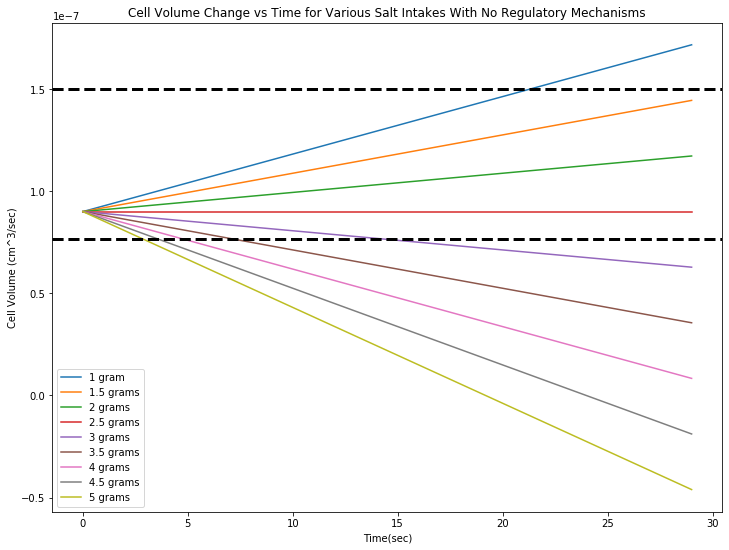

In [41]:
import matplotlib.pyplot as plt
p1 = plt.plot(t,vol1, label ='1 gram')
p2 = plt.plot(t,vol1_5, label='1.5 grams')
p3 = plt.plot(t,vol2, label='2 grams')
p4 = plt.plot(t,vol2_5, label='2.5 grams')
p5 = plt.plot(t,vol3, label='3 grams')
p6 = plt.plot(t,vol3_5, label='3.5 grams')
p7 = plt.plot(t,vol4, label='4 grams')
p8 = plt.plot(t,vol4_5, label='4.5 grams')
p9 = plt.plot(t,vol5, label='5 grams')
plt.xlabel('Time(sec)')
plt.ylabel('Cell Volume (cm^3/sec)')
plt.title('Cell Volume Change vs Time for Various Salt Intakes With No Regulatory Mechanisms')
plt.legend()
plt.axhline(y = 15*10**-8, color='black', linestyle='dashed', linewidth=3)
plt.axhline(y = 7.65*10**-8, color='black', linestyle='dashed', linewidth=3)

## What Can We Conclude From the Visualization?
First, it must again be noted that this is a highly simplified model to represent how critical watching salt consumption is and how fragile red blood cells are. We can see how all points begin from the approximate cell volume and gradually decrease or increase, depending on the amount of salt consumed. We can also take notice of the fact that there is a very narrow space between cell bursting and cell shriveling; proving how fragile and sensitive erythrocytes are. 

This graph also shows how lucky we are to have other regulatory mechanisms that ease the flow of water inside and outside the cell; with these values it would seem as if the only way to prevent cell death within 30 seconds is to eat between 1.5 grams and 2.5 grams of salt per day!

## Resources 
* https://www.who.int/news-room/fact-sheets/detail/salt-reduction
* https://www.sciencedirect.com/science/article/abs/pii/0022519364900190
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC151002/#:~:text=With%20very%20few%20exceptions%2C%20ions,is%207.16%20%C3%85%20(15).
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC34029/
* https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711#:~:text=It%20helps%20maintain%20normal%20blood,falls%20below%20135%20mEq%2FL.
* https://www.sciencedirect.com/science/article/pii/S0376738800832834
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3736675/
* https://journals.physiology.org/doi/full/10.1152/physrev.1998.78.1.247#:~:text=Functional%20Significance%20of%20Cell%20Volume%20Regulatory%20Mechanisms.,Rev.&text=Accordingly%2C%20alterations%20of%20cell%20volume,cell%20proliferation%2C%20and%20cell%20death.
* https://inphyni.cnrs.fr/webpages/mederic-argentina/files/2014Vol.pdf
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2238020/pdf/273.pdf